Importação das bibliotecas

In [ ]:
import pandas as pd
import seaborn as srn
import statistics as sts

importação dos dados

In [ ]:
dataset = pd.read_csv("Churn.csv", sep=";")
# Visualizar
dataset.head()

In [3]:
# Tamanho
dataset.shape

(999, 12)

Primeiro problema das colunas

In [ ]:
dataset.columns = ("Id", "Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito","Ativo","Salario","Saiu")

In [5]:
# Visualizar
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


exploração dos dados categóricos

In [8]:
# Estados
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

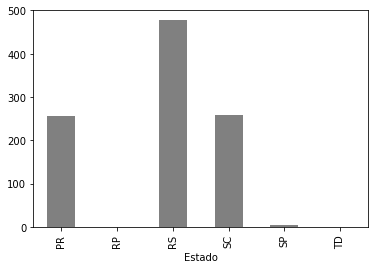

In [9]:
agrupado.plot.bar(color = "grey")

In [12]:
# Genero
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

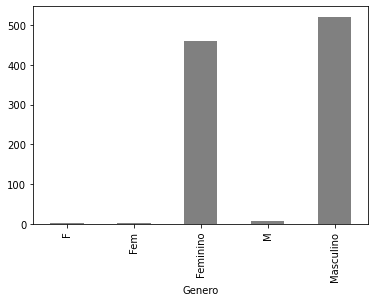

In [13]:
agrupado.plot.bar(color = "grey")

exploração dos dado numéricos

In [14]:
# Score
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

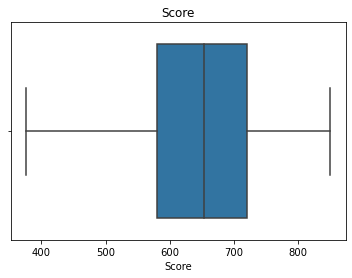

In [15]:
srn.boxplot(dataset['Score']).set_title("Score")

Text(0.5, 1.0, 'Score')

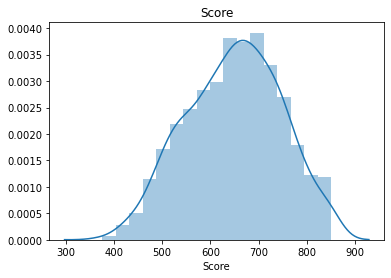

In [17]:
srn.distplot(dataset['Score']).set_title("Score")

In [18]:
# Idade
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

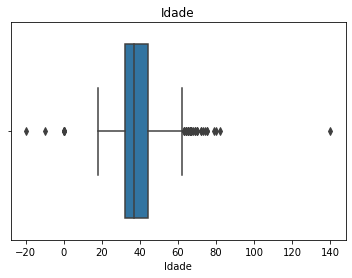

In [19]:
srn.boxplot(dataset['Idade']).set_title("Idade")

Text(0.5, 1.0, 'Idade')

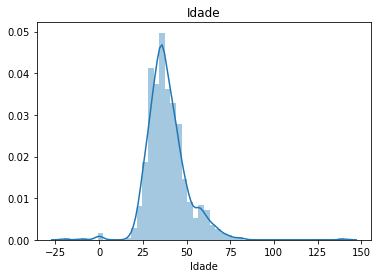

In [20]:
srn.distplot(dataset['Idade']).set_title("Idade")

In [21]:
# Saldo
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

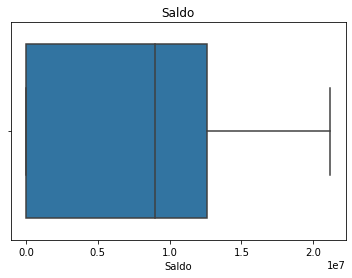

In [22]:
srn.boxplot(dataset['Saldo']).set_title("Saldo")

Text(0.5, 1.0, 'Saldo')

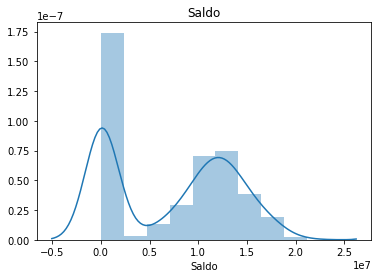

In [23]:
srn.distplot(dataset['Saldo']).set_title("Saldo")


In [26]:
# Salario
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salario')

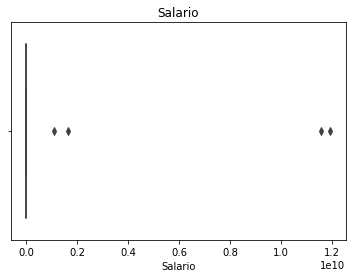

In [25]:
srn.boxplot(dataset['Salario']).set_title("Salario")

Text(0.5, 1.0, 'Salario')

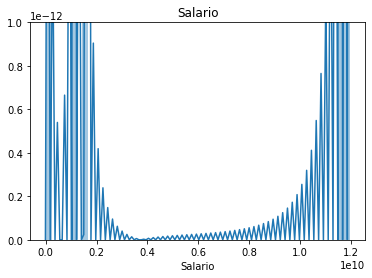

In [24]:
srn.distplot(dataset['Salario']).set_title("Salario")

In [27]:
# Genero e Salario
dataset.isnull().sum()


Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

Tratando NAs

In [28]:
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [30]:
mediana = sts.median(dataset['Salario'])
mediana

70518.0

Substituir os NAs

In [31]:
dataset['Salario'].fillna(mediana, inplace=True)

In [32]:
#verificamos a substitução
dataset['Salario'].isnull().sum()

0

Genero, falta de padronização e NAs

In [33]:
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [35]:
dataset['Genero'].isnull().sum()

8

In [36]:
dataset['Genero'].fillna('Masculino', inplace=True)

In [ ]:
#verificamos novamente NAs
dataset['Genero'].isnull().sum()

Padroniza de acordo com os dominio

In [38]:
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = "Masculino"
dataset.loc[dataset['Genero'].isin(['Fem','F']), 'Genero'] = 'Feminino'
# visualiza o resultado
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

Idades fora de dominio

In [39]:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [40]:
#visualizar
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade']>110)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [41]:
#calcula a mediana
mediana = sts.median(dataset['Idade'])
mediana

37

In [46]:
#Substituimos
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade']>110)] = mediana

In [47]:
# verificamos
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade']>110)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


Ids Duplicados

In [48]:
#visualizamos se tem os duplicados
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
36,37,490,SC,Masculino,31,3,14526023,1,0,1,11406677.0,0
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
867,37,37,37,37,37,37,37,37,37,37,37.0,37
984,37,37,37,37,37,37,37,37,37,37,37.0,37
990,37,37,37,37,37,37,37,37,37,37,37.0,37


In [49]:
#excluimos pelo id
dataset.drop_duplicates(subset='Id', keep='first', inplace=True)
#buscamos duplicados
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


Estados fora de dominio

In [51]:
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    474
SC    258
SP      4
TD      1
dtype: int64

In [52]:
#atribuimos RS (moda) a esses estados
dataset.loc[dataset['Estado'].isin(['RP','SP','TD']), 'Estado'] = 'RS'
agrupado = dataset.groupby(['Estado']).size()

In [53]:
agrupado

Estado
PR    257
RS    480
SC    258
dtype: int64

Outlines no salario

In [54]:
#fazer o desvio
desv = sts.stdev(dataset['Salario'])
desv

529784177.6096346

In [55]:
#definir padrão maio que 2 desvios padrão
# checamos pra ver se algum atende o critério
dataset.loc[dataset['Salario'] >= 2*desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [56]:
#vamos atualizar os salarios para a mediana
mediana = sts.median(dataset['Salario'])
mediana

8641028.0

In [58]:
#atribuimos os valores
dataset.loc[dataset['Salario'] >= 2*desv, 'Salario'] = mediana
#checamos
dataset.loc[dataset['Salario'] >= 2*desv]


,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [59]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [60]:
dataset.shape

(995, 12)